In [1]:
########################################################################
# Part 1: Data loading and Datapreprocessing  #
###########################################################################
########################################################################
# data loading  #
###########################################################################
import numpy as np
import csv

import sklearn.decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
def get_shape(lst):
    if not isinstance(lst, list):
        return ()
    return (len(lst),) + get_shape(lst[0])

def read_csv(path = 'CarsData.csv'):
  """
  Reads a .csv file.

  Input:
      - path: Path of the .csv file

  Return:
      - data: A 10,000 x 10,000 numpy array (the covariance matrix)
  """
  data = []
  
  with open(path, 'r') as file:
      
    csvreader = csv.reader(file)
    
    for row in csvreader:
      a = []
      
      for el in row:
        a.append(el)

      data.append(a)

    # 获取列表形状
    shape = get_shape(data)
    print("列表形状:", shape)
    
  return data

In [2]:
########################################################################
# loading data from CarsData and processing the shape of data #
###########################################################################
M = read_csv("CarsData.csv")

# remove the head
head=M[0]
M=M[1:]

#transpose the matrix
transposed_matrix = [list(row) for row in zip(*M)]


shape = get_shape(transposed_matrix)
print("列表形状:", shape)

列表形状: (97713, 10)
列表形状: (10, 97712)


In [3]:
########################################################################
# Datapreprocessing---one-hot encoding on 'fuel type' and 'transmission'  #
###########################################################################
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

# use one-hot encoding to encode transmission and fuel type
data5 = np.array(transposed_matrix[5])
data3=np.array(transposed_matrix[3])
data=np.stack((data3,data5),axis=1)
print(data[0])
# initialize LabelEncoder and OneHotEncoder
label_encoders = []
one_hot_encoders = []

# one-hot encoding on every column
encoded_data = []
for column in np.array(data).T:
    label_encoder = LabelEncoder()
    encoded_column = label_encoder.fit_transform(column)
    one_hot_encoder = OneHotEncoder(sparse=False)
    encoded_column = one_hot_encoder.fit_transform(encoded_column.reshape(-1, 1))
    encoded_data.append(encoded_column)
    label_encoders.append(label_encoder)
    one_hot_encoders.append(one_hot_encoder)

# stack into a 2d np array
encoded_data_array = np.hstack(encoded_data)

# print_text
print("one hot encoding:")
print(encoded_data_array)
print(encoded_data_array.shape)


['Manual' 'Petrol']
one hot encoding:
[[0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]
(97712, 9)


D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
########################################################################
# Datapreprocessing---mean encoding on 'model' and 'manufactuer' #
###########################################################################
import pandas as pd

indices=[0,9]
y_list = [int(x) for x in transposed_matrix[2]]
y_arr=np.array(y_list)
for i in indices:
    data = {'category': transposed_matrix[i],
            'target': y_list}
    df = pd.DataFrame(data)

    # calculate 'model' and 'manufactuer''s mean encoding
    mean_encoded = df.groupby('category')['target'].mean()

    # Map the mean encoding to the original dataset
    df['mean_encoded_category'] = df['category'].map(mean_encoded)
    array=df['mean_encoded_category'].values
    encoded_data_array=np.concatenate((encoded_data_array, array.reshape(-1,1)),axis=1)
print(encoded_data_array.shape)




(97712, 11)


In [5]:
########################################################################
# Datapreprocessing-- concatenate encoded features with remaining features #
###########################################################################
indices=[1,4,6,7,8]
for i in indices:
    arr=np.array(transposed_matrix[i])
    encoded_data_array=np.concatenate((encoded_data_array,arr.reshape(-1,1)),axis=1)
print(encoded_data_array.shape)


(97712, 16)


In [6]:
########################################################################
# Datapreprocessing-- min-max scaling #
###########################################################################
scale = MinMaxScaler()
scaled_array = scale.fit_transform(encoded_data_array)
print(scaled_array.shape)

(97712, 16)


In [56]:
########################################################################
# Part 2: model training  #
###########################################################################
########################################################################
# hyperparameters tuning----different n_estimaters  #
###########################################################################
import time
start = 150 
stop = 350  
step = 5  
n_estimate=list(range(start, stop, step))
mae=[]
times=[]
for i in range(len(n_estimate)):

    #record the running time
    start_time = time.time()

    #training and testing
    X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)
    
    print("n_estimators:", n_estimate[i])

    # creating gradient boosting model
    gb_regressor = GradientBoostingRegressor(n_estimators=n_estimate[i], learning_rate=0.1, max_depth=10, random_state=4)

    # train the model
    gb_regressor.fit(X_train, y_train)

    # make prediction 
    y_pred = gb_regressor.predict(X_test)
     
    # Calculate Mean absolute Error
    mean_absolute_error = 0
    i = 0
    for pred in y_pred:
        mean_absolute_error += abs(pred - y_test[i])
        i += 1
    mean_absolute_error = mean_absolute_error / len(y_pred)
    mae.append(mean_absolute_error)
    print("mae:",mean_absolute_error)
   
    end_time = time.time()
    execution_time = end_time - start_time
    times.append(execution_time)
    
    print("代码执行时间为:", execution_time, "秒")



n_estimators: 150
mae: 1058.1642524645642
代码执行时间为: 31.10252022743225 秒
n_estimators: 155
mae: 1057.6134217873457
代码执行时间为: 31.62514328956604 秒
n_estimators: 160
mae: 1057.9507314930415
代码执行时间为: 32.57797336578369 秒
n_estimators: 165
mae: 1057.1997564399012
代码执行时间为: 33.700536489486694 秒
n_estimators: 170
mae: 1056.5232565159718
代码执行时间为: 35.03920245170593 秒
n_estimators: 175
mae: 1055.7460233537408
代码执行时间为: 36.130950927734375 秒
n_estimators: 180
mae: 1055.3415522123885
代码执行时间为: 37.03693962097168 秒
n_estimators: 185
mae: 1054.6312357224704
代码执行时间为: 37.714974880218506 秒
n_estimators: 190
mae: 1054.1688716721424
代码执行时间为: 38.96326231956482 秒
n_estimators: 195
mae: 1053.934409892398
代码执行时间为: 40.42808532714844 秒
n_estimators: 200
mae: 1053.9020504516386
代码执行时间为: 42.34122085571289 秒
n_estimators: 205
mae: 1054.0574760037553
代码执行时间为: 42.462968826293945 秒
n_estimators: 210
mae: 1054.0313742785156
代码执行时间为: 43.46713900566101 秒
n_estimators: 215
mae: 1053.9182509010664
代码执行时间为: 44.19082760810852 秒
n_e

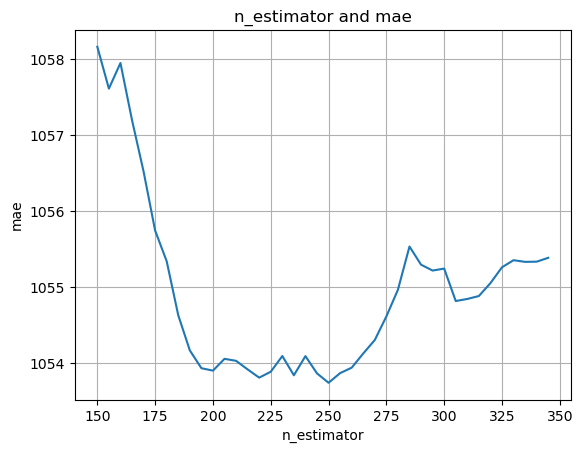

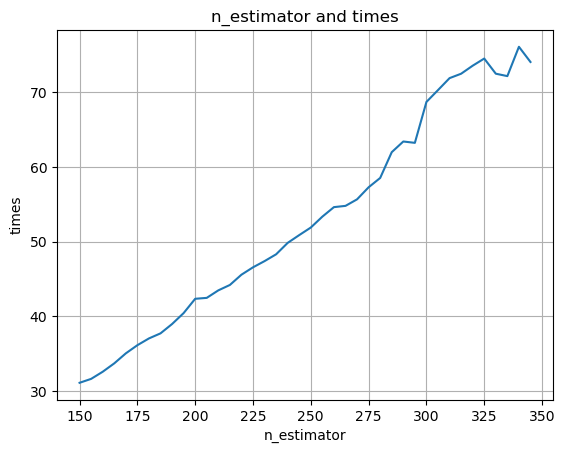

In [57]:
########################################################################
# Plotting mae on different n_estimates #
###########################################################################
import matplotlib.pyplot as plt

# 创建一些示例数据
x = n_estimate
y = mae

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('n_estimator and mae')
plt.xlabel('n_estimator')
plt.ylabel('mae')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


# 创建一些示例数据
x = n_estimate
y = times

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('n_estimator and times')
plt.xlabel('n_estimator')
plt.ylabel('times')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [73]:
########################################################################
# hyperparameters tuning----different n_estimaters_overall tuning  #
###########################################################################
import time
n_estimate=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,800,1000]
mae=[]
times=[]
for i in range(len(n_estimate)):

    #record the running time
    start_time = time.time()

    #training and testing
    X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)
    
    print("n_estimators:", n_estimate[i])

    # creating gradient boosting model
    gb_regressor = GradientBoostingRegressor(n_estimators=n_estimate[i], learning_rate=0.116, max_depth=10, random_state=4)

    # train the model
    gb_regressor.fit(X_train, y_train)

    # make prediction 
    y_pred = gb_regressor.predict(X_test)
     
    # Calculate Mean absolute Error
    mean_absolute_error = 0
    i = 0
    for pred in y_pred:
        mean_absolute_error += abs(pred - y_test[i])
        i += 1
    mean_absolute_error = mean_absolute_error / len(y_pred)
    mae.append(mean_absolute_error)
    print("mae:",mean_absolute_error)
   
    end_time = time.time()
    execution_time = end_time - start_time
    times.append(execution_time)
    
    print("代码执行时间为:", execution_time, "秒")


n_estimators: 50
mae: 1093.9183046972323
代码执行时间为: 9.669463872909546 秒
n_estimators: 100
mae: 1065.8000349932106
代码执行时间为: 19.825820922851562 秒
n_estimators: 150
mae: 1058.1642524645642
代码执行时间为: 30.75005292892456 秒
n_estimators: 200
mae: 1053.9020504516386
代码执行时间为: 40.82714653015137 秒
n_estimators: 250
mae: 1053.7423135777622
代码执行时间为: 51.60148072242737 秒
n_estimators: 300
mae: 1055.2452924524566
代码执行时间为: 62.33465766906738 秒
n_estimators: 350
mae: 1055.4903549713824
代码执行时间为: 73.27310991287231 秒
n_estimators: 400
mae: 1057.1183912425156
代码执行时间为: 83.59982085227966 秒
n_estimators: 450
mae: 1059.0407490101477
代码执行时间为: 94.36169624328613 秒
n_estimators: 500
mae: 1060.096492686423
代码执行时间为: 104.60921382904053 秒
n_estimators: 550
mae: 1062.3066335634953
代码执行时间为: 115.64068508148193 秒
n_estimators: 600
mae: 1063.9073166513706
代码执行时间为: 125.80633425712585 秒
n_estimators: 650
mae: 1065.7837780286527
代码执行时间为: 136.1435034275055 秒
n_estimators: 700
mae: 1067.7511949964473
代码执行时间为: 147.46565580368042 秒
n_e

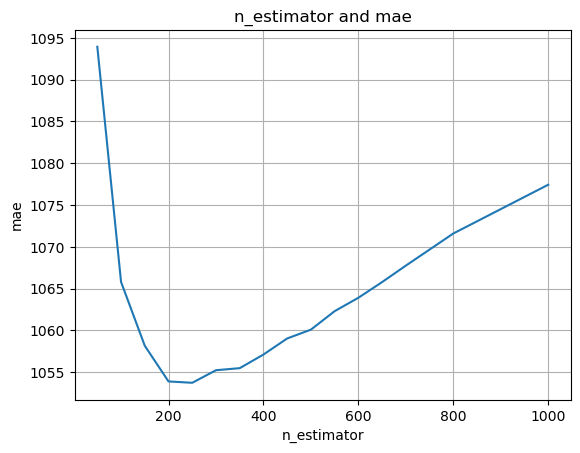

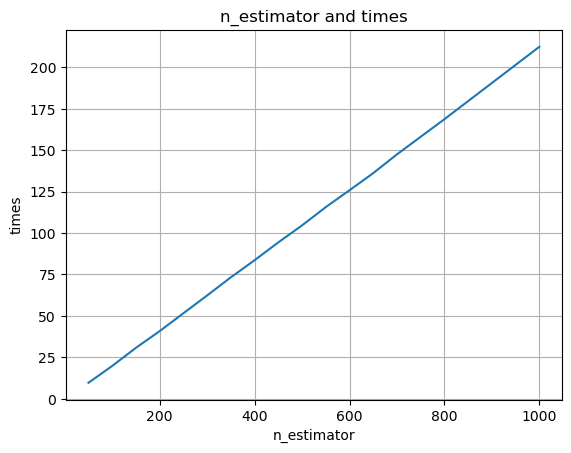

In [74]:
########################################################################
# Plotting mae on different n_estimates #
###########################################################################
import matplotlib.pyplot as plt

# 创建一些示例数据
x = n_estimate
y = mae

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('n_estimator and mae')
plt.xlabel('n_estimator')
plt.ylabel('mae')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


# 创建一些示例数据
x = n_estimate
y = times

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('n_estimator and times')
plt.xlabel('n_estimator')
plt.ylabel('times')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [70]:
########################################################################
# hyperparameters tuning----different max_depth  #
###########################################################################
import time
max_dep=[5,6,7,8,9,10,11,12,13,14,15,16,17,18]
mae=[]
times=[]
for i in range(len(max_dep)):

    #record the running time
    start_time = time.time()

    #training and testing
    X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)
    print("max_depth:", max_dep[i])


    # creating gradient boosting model
    gb_regressor = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=max_dep[i], random_state=4)

    # train the model
    gb_regressor.fit(X_train, y_train)

    # make prediction 
    y_pred = gb_regressor.predict(X_test)

    # Calculate Mean absolute Error
    mean_absolute_error = 0
    i = 0
    for pred in y_pred:
        mean_absolute_error += abs(pred - y_test[i])
        i += 1
    mean_absolute_error = mean_absolute_error / len(y_pred)
    mae.append(mean_absolute_error)
    print("mae:",mean_absolute_error)
    
    end_time = time.time()
    execution_time = end_time - start_time
    times.append(execution_time)

    print("代码执行时间为:", execution_time, "秒")



max_depth: 5
mae: 1260.468281634697
代码执行时间为: 26.259235858917236 秒
max_depth: 6
mae: 1187.3984480081872
代码执行时间为: 31.379663467407227 秒
max_depth: 7


KeyboardInterrupt: 

In [ ]:
########################################################################
# Plotting mae on different max_depth #
###########################################################################
import matplotlib.pyplot as plt

# 创建一些示例数据
x = max_dep
y = mae

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('max_depth and mae')
plt.xlabel('max_depth')
plt.ylabel('mae')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


# 创建一些示例数据
x = max_dep
y = times

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('max_depth and times')
plt.xlabel('max_depth')
plt.ylabel('times')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [64]:
########################################################################
# hyperparameters tuning----learning rate  #
###########################################################################
import time
start = 0.074
stop = 0.126
step = 0.002

l_r = [round(start + i * step, 3) for i in range(int((stop - start) / step))]
mae=[]
times=[]
for i in range(len(l_r)):

    #record the running time
    start_time = time.time()

    #training and testing
    X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)


    print("learn_rate:", l_r[i])
    # creating gradient boosting model
    gb_regressor = GradientBoostingRegressor(n_estimators=250,learning_rate=l_r[i], max_depth=10, random_state=4)

    # train the model
    gb_regressor.fit(X_train, y_train)

    # make prediction 
    y_pred = gb_regressor.predict(X_test)

    # Calculate Mean absolute Error
    mean_absolute_error = 0
    i = 0
    for pred in y_pred:
        mean_absolute_error += abs(pred - y_test[i])
        i += 1
    mean_absolute_error = mean_absolute_error / len(y_pred)
    mae.append(mean_absolute_error)
    print("mae:",mean_absolute_error)
    
    end_time = time.time()
    execution_time = end_time - start_time
    times.append(execution_time)

    print("代码执行时间为:", execution_time, "秒")



learn_rate: 0.074
mae: 1056.3584726833067
代码执行时间为: 51.87733864784241 秒
learn_rate: 0.076
mae: 1060.5255451249786
代码执行时间为: 52.11817932128906 秒
learn_rate: 0.078
mae: 1054.082235041268
代码执行时间为: 52.281633615493774 秒
learn_rate: 0.08
mae: 1055.7108296702156
代码执行时间为: 51.79683256149292 秒
learn_rate: 0.082
mae: 1056.216829162621
代码执行时间为: 52.27819490432739 秒
learn_rate: 0.084
mae: 1055.85789896092
代码执行时间为: 52.414292097091675 秒
learn_rate: 0.086
mae: 1055.7227273646158
代码执行时间为: 52.59105348587036 秒
learn_rate: 0.088
mae: 1053.5643770830754
代码执行时间为: 52.08960795402527 秒
learn_rate: 0.09
mae: 1059.2440661549174
代码执行时间为: 52.176979541778564 秒
learn_rate: 0.092
mae: 1057.9877999695132
代码执行时间为: 52.15910887718201 秒
learn_rate: 0.094
mae: 1054.9818437239417
代码执行时间为: 52.339314699172974 秒
learn_rate: 0.096
mae: 1056.300066522421
代码执行时间为: 51.99294853210449 秒
learn_rate: 0.098
mae: 1057.8417739147744
代码执行时间为: 52.20244860649109 秒
learn_rate: 0.1
mae: 1051.6033832234796
代码执行时间为: 52.35003328323364 秒
learn_rate:

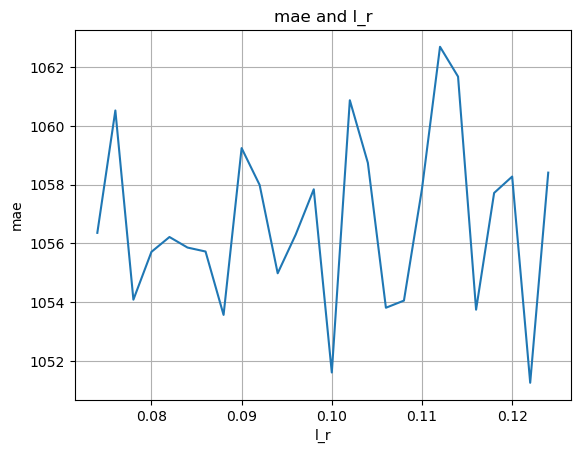

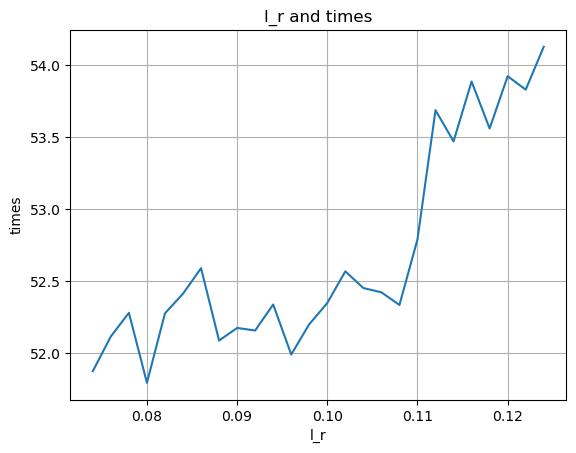

In [65]:
########################################################################
# Plotting mae on different learning rate #
###########################################################################
import matplotlib.pyplot as plt

# 创建一些示例数据
x = l_r
y = mae

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('mae and l_r')
plt.xlabel('l_r')
plt.ylabel('mae')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


# 创建一些示例数据
x = l_r
y = times

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('l_r and times')
plt.xlabel('l_r')
plt.ylabel('times')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [75]:
########################################################################
# hyperparameters tuning----learning rate_overall  #
###########################################################################
import time
l_r=[0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]
mae=[]
times=[]
for i in range(len(l_r)):

    #record the running time
    start_time = time.time()

    #training and testing
    X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)


    print("learn_rate:", l_r[i])
    # creating gradient boosting model
    gb_regressor = GradientBoostingRegressor(n_estimators=250, learning_rate=l_r[i], max_depth=10, random_state=4)

    # train the model
    gb_regressor.fit(X_train, y_train)

    # make prediction 
    y_pred = gb_regressor.predict(X_test)

    # Calculate Mean absolute Error
    mean_absolute_error = 0
    i = 0
    for pred in y_pred:
        mean_absolute_error += abs(pred - y_test[i])
        i += 1
    mean_absolute_error = mean_absolute_error / len(y_pred)
    mae.append(mean_absolute_error)
    print("mae:",mean_absolute_error)
    
    end_time = time.time()
    execution_time = end_time - start_time
    times.append(execution_time)

    print("代码执行时间为:", execution_time, "秒")



learn_rate: 0.025
mae: 1086.114141160462
代码执行时间为: 50.00220513343811 秒
learn_rate: 0.05
mae: 1063.9948803842472
代码执行时间为: 51.801841259002686 秒
learn_rate: 0.075
mae: 1061.6414189231914
代码执行时间为: 51.80310606956482 秒
learn_rate: 0.1
mae: 1051.6033832234796
代码执行时间为: 52.73620319366455 秒
learn_rate: 0.125
mae: 1058.0713428647418
代码执行时间为: 51.69406867027283 秒
learn_rate: 0.15
mae: 1066.1054058377892
代码执行时间为: 51.52446365356445 秒
learn_rate: 0.175
mae: 1072.9063998072504
代码执行时间为: 51.0726535320282 秒
learn_rate: 0.2
mae: 1078.3857243709654
代码执行时间为: 51.75899410247803 秒
learn_rate: 0.225
mae: 1085.1796787517185
代码执行时间为: 52.15166711807251 秒
learn_rate: 0.25
mae: 1095.4998117043299
代码执行时间为: 52.32072162628174 秒


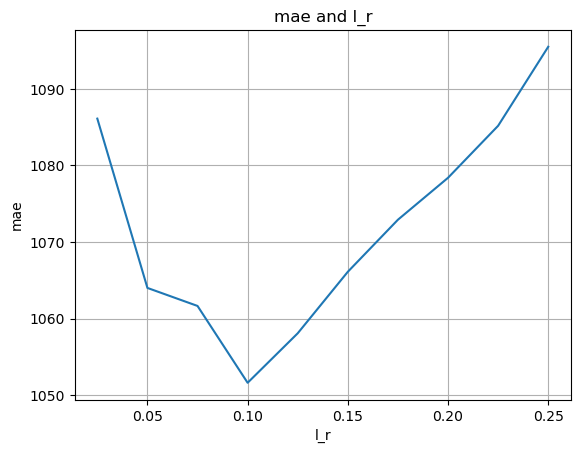

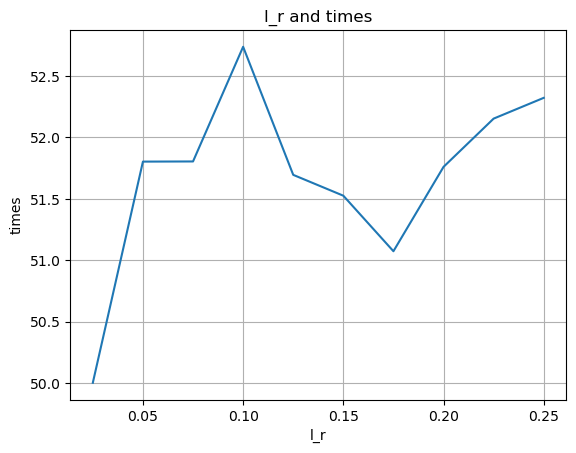

In [76]:
########################################################################
# Plotting mae on different learning rate #
###########################################################################
import matplotlib.pyplot as plt

# 创建一些示例数据
x = l_r
y = mae

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('mae and l_r')
plt.xlabel('l_r')
plt.ylabel('mae')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


# 创建一些示例数据
x = l_r
y = times

# 使用matplotlib绘制折线图
plt.plot(x, y)

# 添加标题和标签
plt.title('l_r and times')
plt.xlabel('l_r')
plt.ylabel('times')

# 显示网格
plt.grid(True)

# 显示图形
plt.show()

In [63]:
########################################################################
# Part 2: optimal value(temp)  #
###########################################################################
import time
from sklearn.metrics import r2_score
#record the running time
start_time = time.time()

#training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)



# creating gradient boosting model
gb_regressor = GradientBoostingRegressor(n_estimators=250, learning_rate=0.1, max_depth=10, random_state=4)

# train the model
gb_regressor.fit(X_train, y_train)

# make prediction 
y_pred = gb_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


# Calculate Mean absolute Error
mean_absolute_error = 0
i = 0
for pred in y_pred:
    mean_absolute_error += abs(pred - y_test[i])
    i += 1
mean_absolute_error = mean_absolute_error / len(y_pred)
print(mean_absolute_error)

end_time = time.time()
execution_time = end_time - start_time

print("代码执行时间为:", execution_time, "秒")



R-squared: 0.9702669159305045
1053.7423135777622
代码执行时间为: 52.74823188781738 秒


In [33]:
########################################################################
# baseline algorithm #
###########################################################################
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score
#record the running time
start_time = time.time()

#training and testing
X_train, X_test, y_train, y_test = train_test_split(scaled_array, y_arr, test_size=0.20, random_state=5)



# 创建线性回归模型
model = LinearRegression()

# 在训练集上拟合模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算平均绝对误差
mae = mean_absolute_error(y_test, y_pred)
print(mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

end_time = time.time()
execution_time = end_time - start_time
times.append(execution_time)

print("代码执行时间为:", execution_time, "秒")

2473.424428463836
R-squared: 0.8446925839779292
代码执行时间为: 0.0472872257232666 秒
